In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.stats import gamma as gamma
import scipy as stats
import warnings
warnings.filterwarnings('ignore')


### Baca dataset


In [2]:
data = pd.read_csv("../dataset/greenhouse-gas-emissions-in-the-netherlands/emission.csv", delimiter = ";")


In [3]:
data.head()


ID    Bronnen  Perioden   CO2_1    CH4_2  N2O_3
0   0  T001176    1990JJ00  163120  1278.17  59.49
1   1  T001176    1995JJ00  173520  1192.41  59.84
2   2  T001176    2000JJ00  172290   975.64  53.01
3   3  T001176    2001JJ00  177390   949.16  49.71
4   4  T001176    2002JJ00  176670   904.27  47.01

### Visualisasi emisi gas CO2 dengan histogram

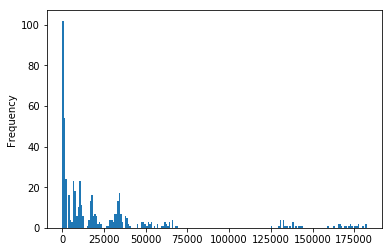

In [4]:
data['CO2_1'].plot(kind = 'hist', bins = 200)


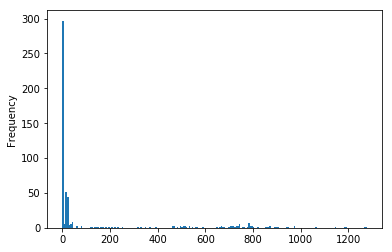

In [5]:
data['CH4_2'].plot(kind = 'hist', bins = 200)


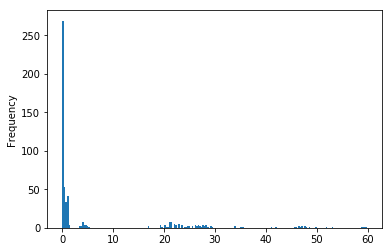

In [6]:
data['N2O_3'].plot(kind = 'hist', bins = 200)


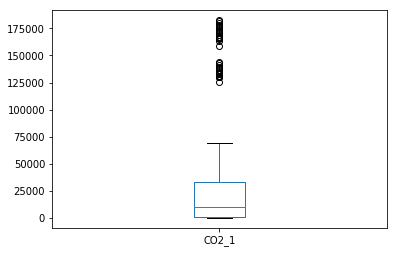

In [7]:
data['CO2_1'].plot(kind = "box")


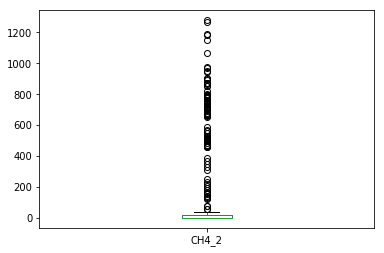

In [8]:
data['CH4_2'].plot(kind = "box")


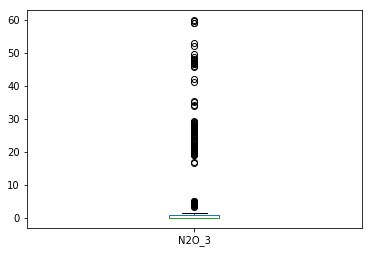

In [9]:
data['N2O_3'].plot(kind = "box")


### Deskripsi data
### Maksimum


In [10]:
data['CO2_1'].max()


182440

### Minimum


In [11]:
data['CO2_1'].min()


30

### Nilai tengah


In [12]:
data['CO2_1'].median()


10065.0

### Modus


In [13]:
data['CO2_1'].mode()


0    40
dtype: int64

### Rataan


In [14]:
data['CO2_1'].mean()


25673.01923076923

### Variansi


In [15]:
data['CO2_1'].var()


1664567682.7741964

### Simpangan baku


In [16]:
data['CO2_1'].std()


40799.11374986222

### Kecenderungan puncak data


In [17]:
data['CO2_1'].skew()


2.47848175690753

### Mencari nilai alpha dan beta untuk masing-masing emisi gas


In [18]:
fit_a_c, fit_loc_c, fit_b_c = gamma.fit(data['CO2_1'])


In [19]:
fit_a_m, fit_loc_m, fit_b_m = gamma.fit(data['CH4_2'])


In [20]:
fit_a_n, fit_loc_n, fit_b_n = gamma.fit(data['N2O_3'])


In [21]:
data_1 = data
data_1 = data_1.iloc[0:20]
data_1[['Year', 'Temp', 'Temp2']] = data_1.Perioden.str.split("J", expand = True,)
data_1.drop(['Temp', 'Temp2'], axis = 1)
data_1['Year'] = pd.to_numeric(data_1['Year'], errors = "coerce")
data_1


ID    Bronnen  Perioden   CO2_1    CH4_2  N2O_3  Year Temp Temp2
0    0  T001176    1990JJ00  163120  1278.17  59.49  1990         00
1    1  T001176    1995JJ00  173520  1192.41  59.84  1995         00
2    2  T001176    2000JJ00  172290   975.64  53.01  2000         00
3    3  T001176    2001JJ00  177390   949.16  49.71  2001         00
4    4  T001176    2002JJ00  176670   904.27  47.01  2002         00
5    5  T001176    2003JJ00  180090   874.05  46.59  2003         00
6    6  T001176    2004JJ00  181710   856.72  48.08  2004         00
7    7  T001176    2005JJ00  177800   800.50  47.76  2005         00
8    8  T001176    2006JJ00  173000   783.83  47.58  2006         00
9    9  T001176    2007JJ00  172860   786.81  42.03  2007         00
10  10  T001176    2008JJ00  175770   795.75  29.36  2008         00
11  11  T001176    2009JJ00  170410   785.77  28.66  2009         00
12  12  T001176    2010JJ00  182440   783.90  27.67  2010         00
13  13  T001176    2011JJ00  169370   761.25  27.04  2011         00
14  14  T001176    2012JJ00  166130   746.01  26.43  2012         00
15  15  T001176    2013JJ00  166020   745.28  27.11  2013         00
16  16  T001176    2014JJ00  158870   729.39  27.50  2014         00
17  17  T001176    2015JJ00  166870   737.37  28.42  2015         00
18  18  T001176    2016JJ00  167040   743.46  27.57  2016         00
19  19  T001176    2017JJ00  165190   718.96  29.04  2017         00

# Ekpektasi Merusak Lingkungan :: Karbon > 12000


In [22]:
N = data_1['CO2_1'].count().astype(int)
Eks_carb = 0.0
for i in range(0, int(N), 1):
    Eks_carb += data_1['CO2_1'][i] * gamma.pdf(data_1['CO2_1'][i], fit_a_c, loc = fit_loc_c, scale = fit_b_c)
print(Eks_carb)


0.7134426955222093


# Ekpektasi Merusak Lingkungan :: Metana > 600


In [23]:
Eks_meth = 0.0
for i in range(0, int(N), 1):
    Eks_meth += data_1['CH4_2'][i] * gamma.pdf(data_1['CH4_2'][i], fit_a_m, loc = fit_loc_m, scale = fit_b_m)
print(Eks_meth)


0.1715994930409914


# Ekpektasi Merusak Lingkungan :: Nitro Oksida > 25


In [24]:
Eks_nitr = 0.0
for i in range(0, int(N), 1):
    Eks_nitr += data_1['N2O_3'][i] * gamma.pdf(data_1['N2O_3'][i], fit_a_n, loc = fit_loc_n, scale = fit_b_n)
print(Eks_nitr)


0.7456842788017807



# METANA dibawah 600


In [25]:
fit_a, fit_loc, fit_b = gamma.fit(data_1['CH4_2'])
print(fit_a, fit_loc, fit_b)


0.7715530191977069 718.9599999999998 121.88856656286725


In [26]:
f_meth = gamma.cdf(600, fit_a, fit_loc, scale = fit_b)
f_meth


0.0


# NITRO OKSIDA dibawah 25


In [27]:
fit_a, fit_loc, fit_b = gamma.fit(data_1['N2O_3'])
print(fit_a, fit_loc, fit_b)


0.8073094977314081 26.429999999999996 9.232118601400739


In [28]:
f_nitr = gamma.cdf(25, fit_a, fit_loc, scale = fit_b)
f_nitr


0.0